![test](ceg2707_logo_notebook.png)

# Map projections

Here I document various maps I use in my lectures for the CEG2719 Map Projections module.


In [1]:
import pyproj
import pygmt
import numpy as np
import shapely.geometry as sgeom
from geopandas import GeoSeries
from pyproj import Geod


## Tissot's indicatrix

This is not a Tissot’s indicatrix code, which visualize a projection’s distortion by computation at specific points; instead, the blue small circles of 400km radius are projected to provide a way to vizualise the distortion. Solution from [stackoverflow](https://stackoverflow.com/questions/31492220/how-to-plot-a-tissot-with-cartopy-and-matplotlib)

In [2]:
def circle(geod, lon, lat, radius, n_samples=360):
    """
    Return the coordinates of a geodetic circle of a given
    radius about a lon/lat point.

    Radius is in meters in the geodetic's coordinate system.

    """
    lons, lats, back_azim = geod.fwd(np.repeat(lon, n_samples),
                                     np.repeat(lat, n_samples),
                                     np.linspace(360, 0, n_samples),
                                     np.repeat(radius, n_samples),
                                     radians=False,
                                     )
    return lons, lats

In [3]:
geod = Geod(ellps='WGS84')

radius_km = 400
n_samples = 80

geoms = []
for lat in np.linspace(-80, 80, 10):
    for lon in np.linspace(-180, 180, 7, endpoint=False):
        lons, lats = circle(geod, lon, lat, radius_km * 1e3, n_samples)
        geoms.append(sgeom.Polygon(zip(lons, lats)))

gdf = GeoSeries(geoms)

## Equidistant Cylindrical projection

Known also as Plate Carrée projection, is a simple map projection attributed to Marinus of Tyre, who Ptolemy claims invented the projection about AD 100.

### Graticules

- meridians are equally-spaced vertical standard lines
- parallels are equally-spaced horizontal lines of equal length

### Parameters

- The scale in plot-units/degree

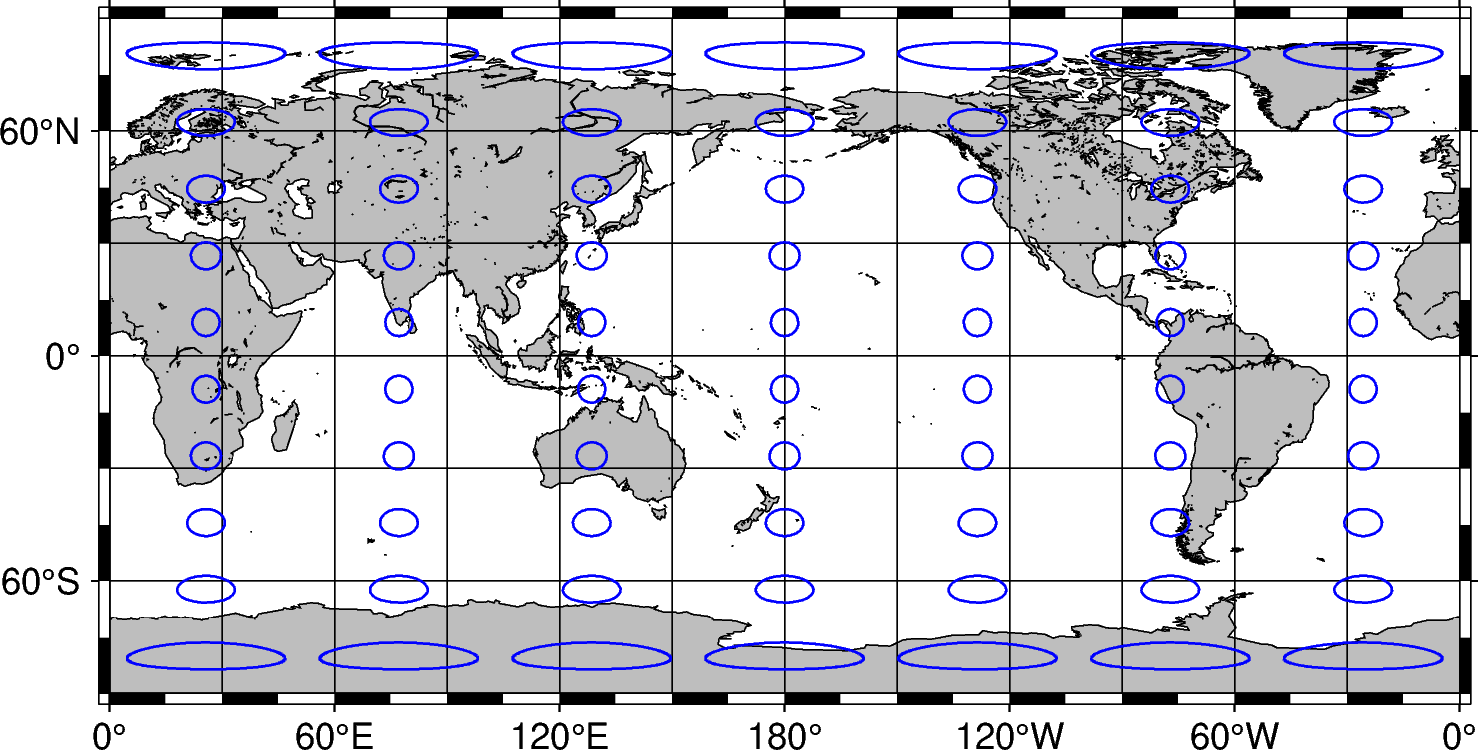

In [5]:
Tissot = True
fig = pygmt.Figure()
fig.coast(projection="Q4.5i", region="g", frame="afg30", land="gray", shorelines=True)
if (Tissot):
    fig.plot(
        data=gdf,
        pen="0.5p,blue",
    )
fig.show(width=900)

## Cylindrical equal-area projection

This projection is cylindrical in normal, has a normal aspect and equal-area, that means any two areas in the map have the same relative size compared to their size on the sphere.
A world map centered on the 35ºE meridian using the Behrman projection (Figure Behrman cylindrical projection) can be obtained:

### Graticule:
- meridians are equally-spaced vertical straight lines
- parallels are unequally-spaced horizontal lines of equal length, closest near the poles, cutting meridians at right angles

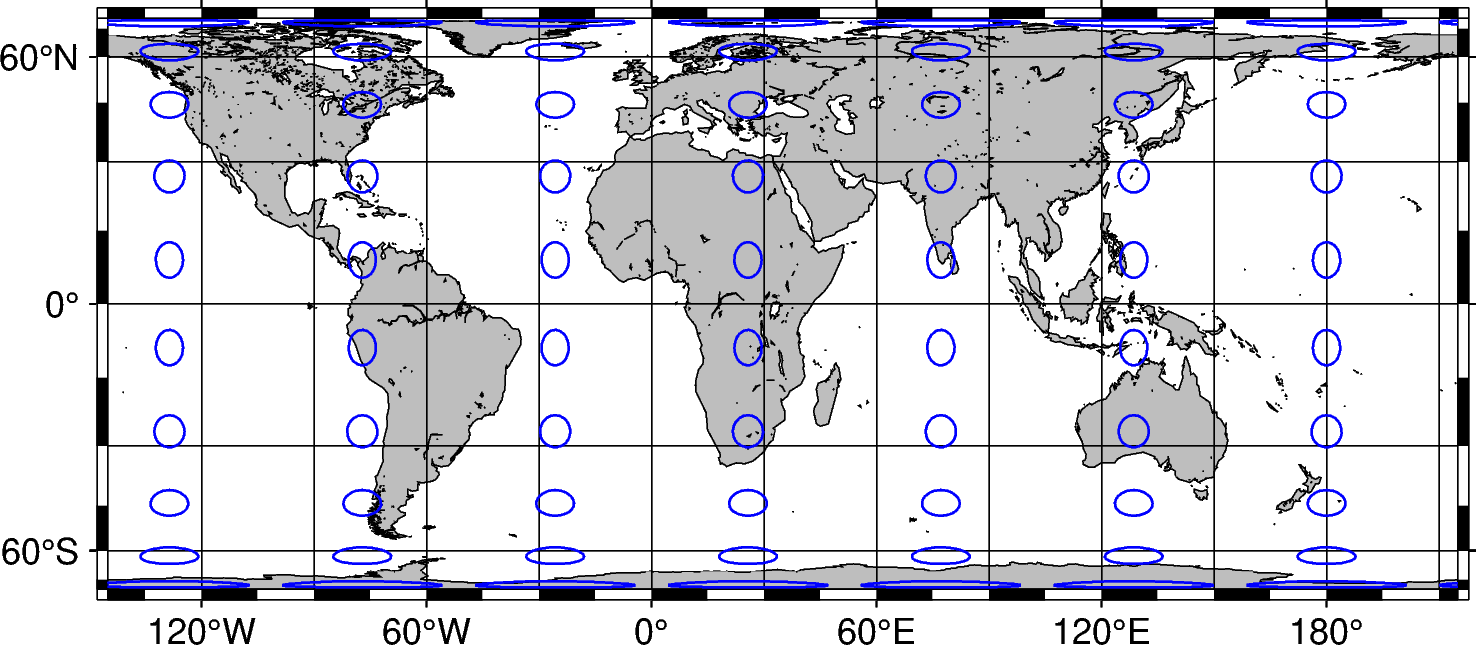

In [6]:
Tissot = True
fig = pygmt.Figure()
fig.coast(projection="Y35/30/4.5i", region="-145/215/-90/90", frame="afg30", land="gray", shorelines=True)
if (Tissot):
    fig.plot(
        data=gdf,
        pen="0.5p,blue",
    )
fig.show(width=900)

## Gall-Peters

The Gall–Peters projection is a rectangular, equal-area map projection. Like all equal-area projections, it distorts most shapes. It is a cylindrical equal-area projection with latitudes 45° north and south as the regions on the map that have no distortion.

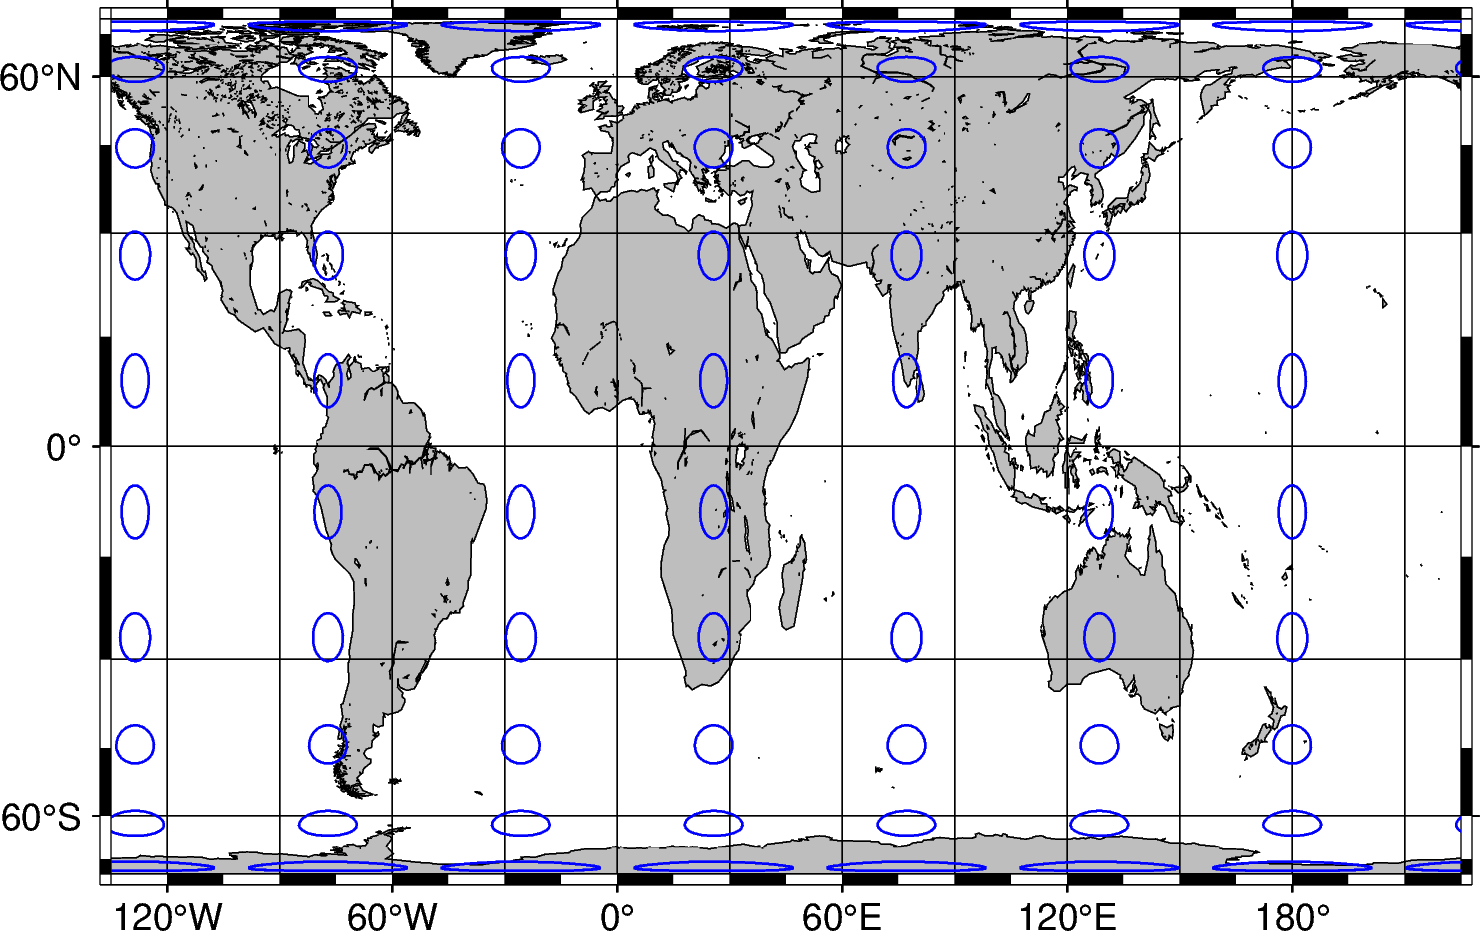

In [7]:
Tissot = True
fig = pygmt.Figure()
fig.coast(projection="Y45/45/4.5i", region="-145/215/-90/90", frame="afg30", land="gray", shorelines=True)
if (Tissot):
    fig.plot(
        data=gdf,
        pen="0.5p,blue",
    )
fig.show(width=900)

## Mercator

Introduced by Gerardus Mercator in 1569 / Normal aspect
- Graticule:
    - meridians are equally-spaced vertical straight lines
    - parallels are unequally-spaced horizontal lines of equal length, closest near the Equator, cutting meridians at right angles.

This example is centered on the Dateline with a scale of 0.012 inch pr degree.

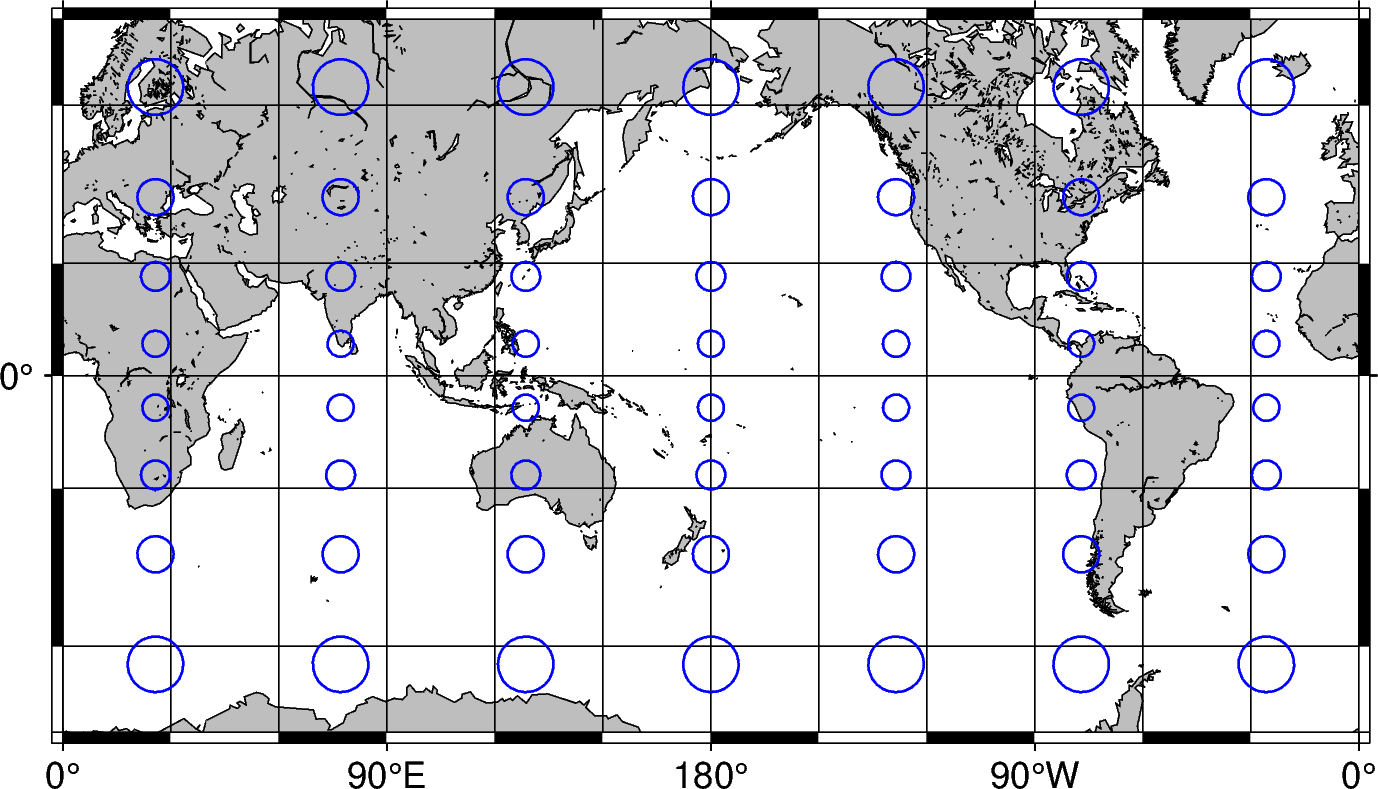

In [9]:
Tissot = True
fig = pygmt.Figure()
fig.coast(projection="m1.2e-2i", region="0/360/-70/70", frame="afg30", land="gray", shorelines=True)
if (Tissot):
    fig.plot(
        data=gdf,
        pen="0.5p,blue",
    )
fig.show(width=900)

## Transverse Mercator projection

### Graticule:

- the Equator, the central meridian and each meridian 90° away from the central meridian are straight lines
- all other meridians and parallels are orthogonal complex curves

> Below, the 360º range is understood to mean the extent of the plot along the central meridian, while the “south” and “north” values represent how far from the central longitude we want the plot to extend. These values correspond to latitudes in the regular Mercator projection and must therefore be less than 90.
 

### Parameters

- The central meridian ($\lambda_0$).
-  the latitude of origin ($\phi_0$)
- The scale along the equator in plot-units/degree.


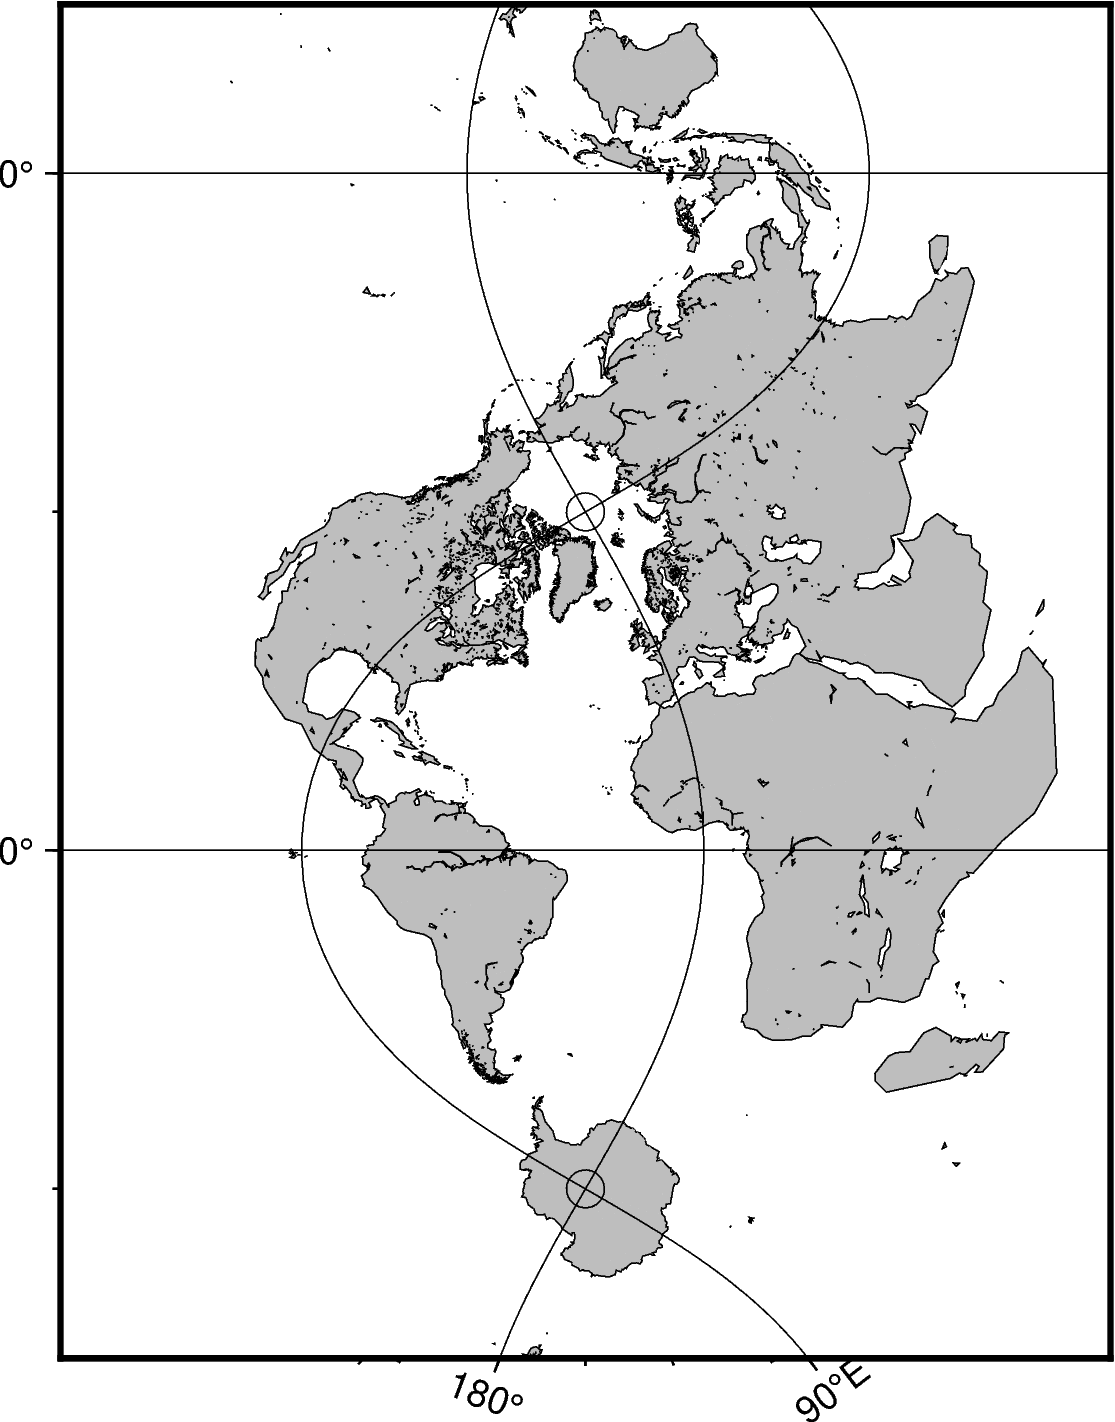

In [8]:
Tissot = False
fig = pygmt.Figure()
fig.coast(projection="T330/-45/3.5i", region="0/360/-80/80", frame="afg", land="gray", shorelines=True)
if (Tissot):
    fig.plot(
        data=gdf,
        pen="0.5p,blue",
    )
fig.show(width=600)

## Universal Transverse Mercator(UTM)

> A particular subset of the transverse Mercator is the Universal Transverse Mercator (UTM) which was adopted by the US Army for large-scale military maps. Here, the globe is divided into 60 zones between 84ºS and 84ºN, most of which are 6 wide. Each of these UTM zones have their unique central meridian.

UK lies within zones 29, 30 and 31.

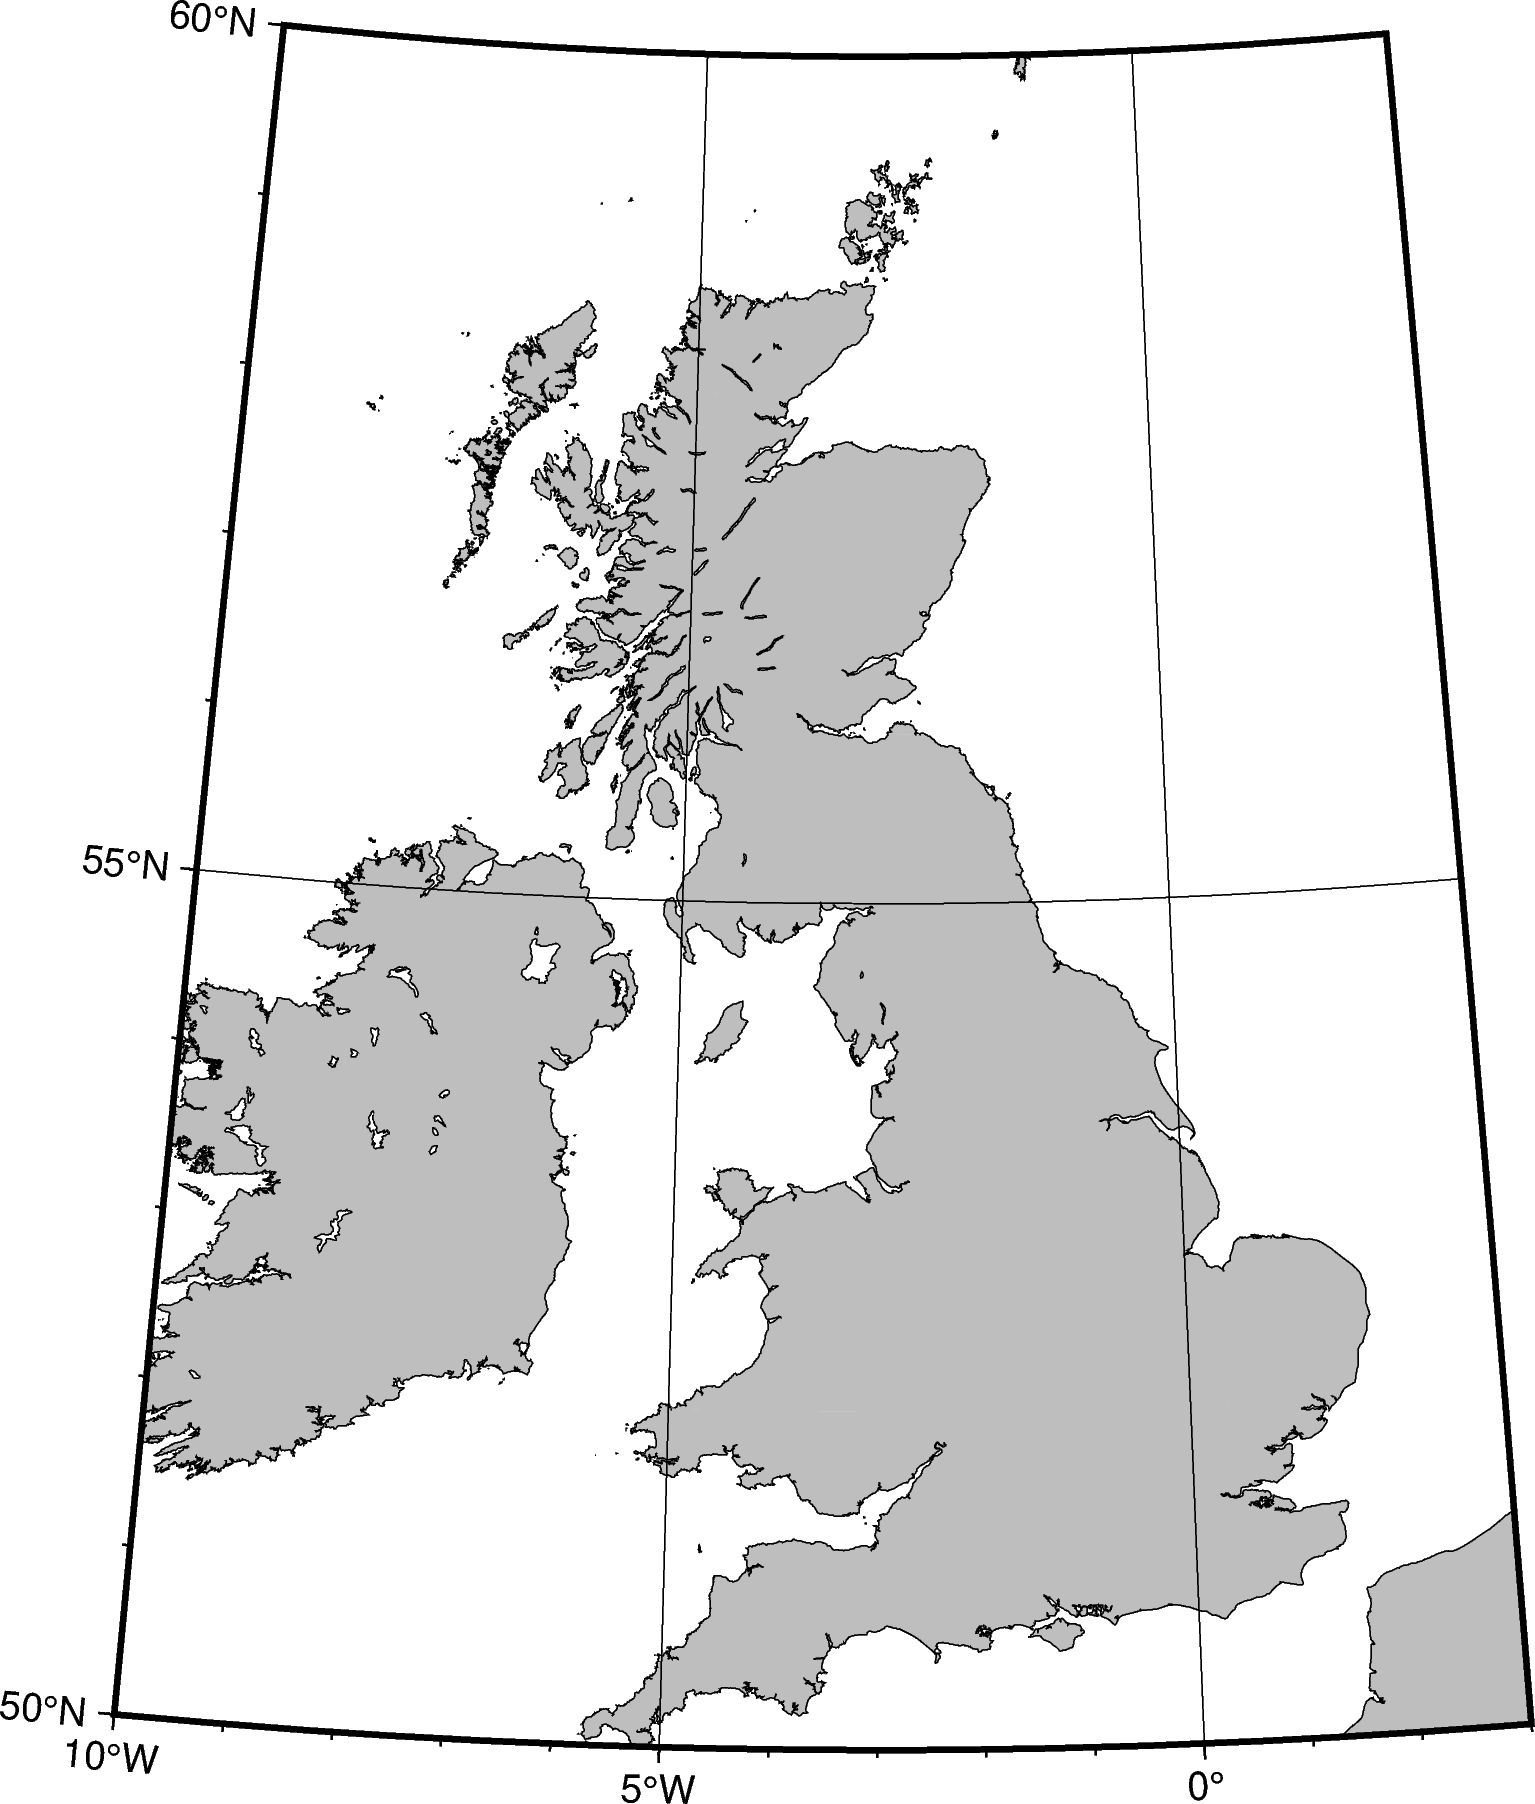

In [13]:
fig = pygmt.Figure()
# UTM Zone is set to 30R
fig.coast(
    region=[-10, 3, 50, 60],
    projection="U30R/12c",
    land="gray",
    water="white",
    shorelines="thinnest",
    frame="afg",
)

fig.show()

## Oblique Mercator projection

Generalisation of the normal/transverse Mercator projections
-  Developed by Rosenmund, Laborde, Hotine and others during 1900–1950

### Graticule:
- two meridians 180° apart are straight lines
- all other meridians and parallels are orthogonal complex curv

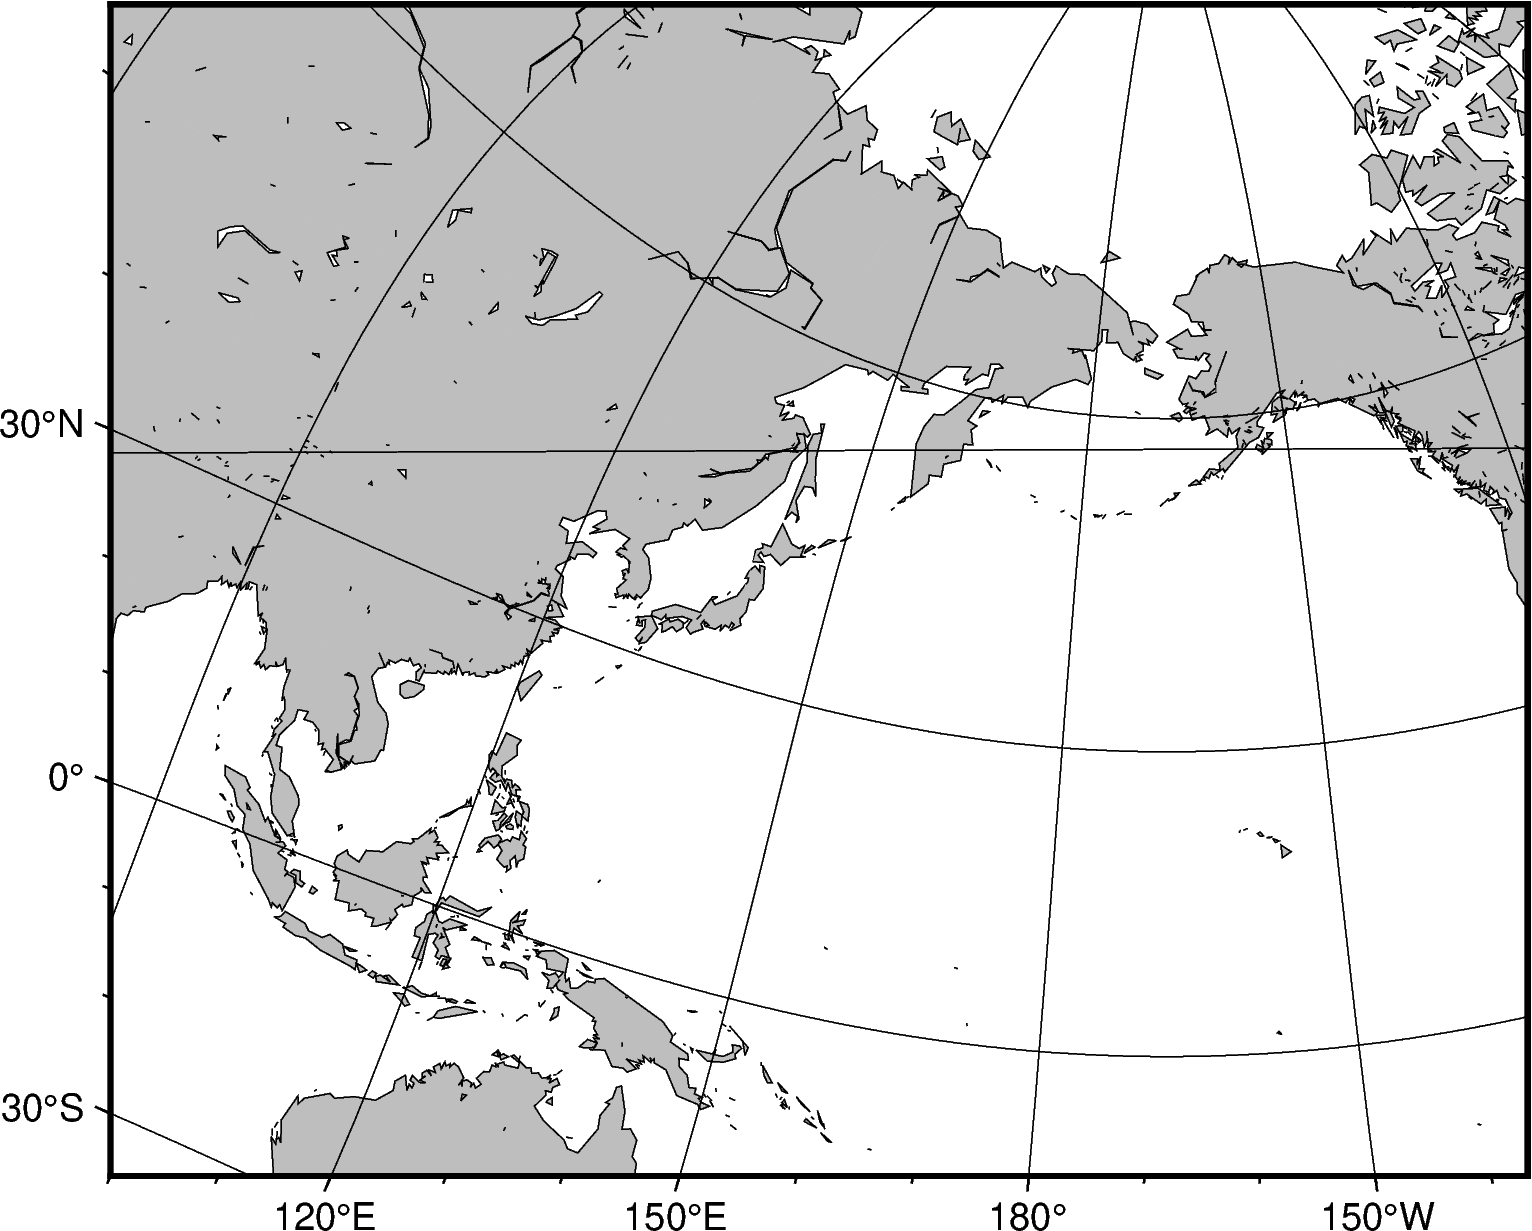

In [91]:
fig = pygmt.Figure()
# Using the origin and azimuth
fig.coast(
    projection="Oc260/25.5/12/69/12c",
    # Set bottom left and top right coordinates of the figure with "+r"
    region="100/-35/280/75+r",
    land="gray",
    water="white",
    shorelines="thinnest",
    frame="afg"
)
fig.show(width=600)

## Gnomonic 

### Graticule:

- all meridians (in the polar and equatorial aspects) and the Equator (only in the equatorial aspect) are straight lines
- all parallels except the Equator and poles are circles (in the polar aspect), ellipses, parabolae or hyperbolae

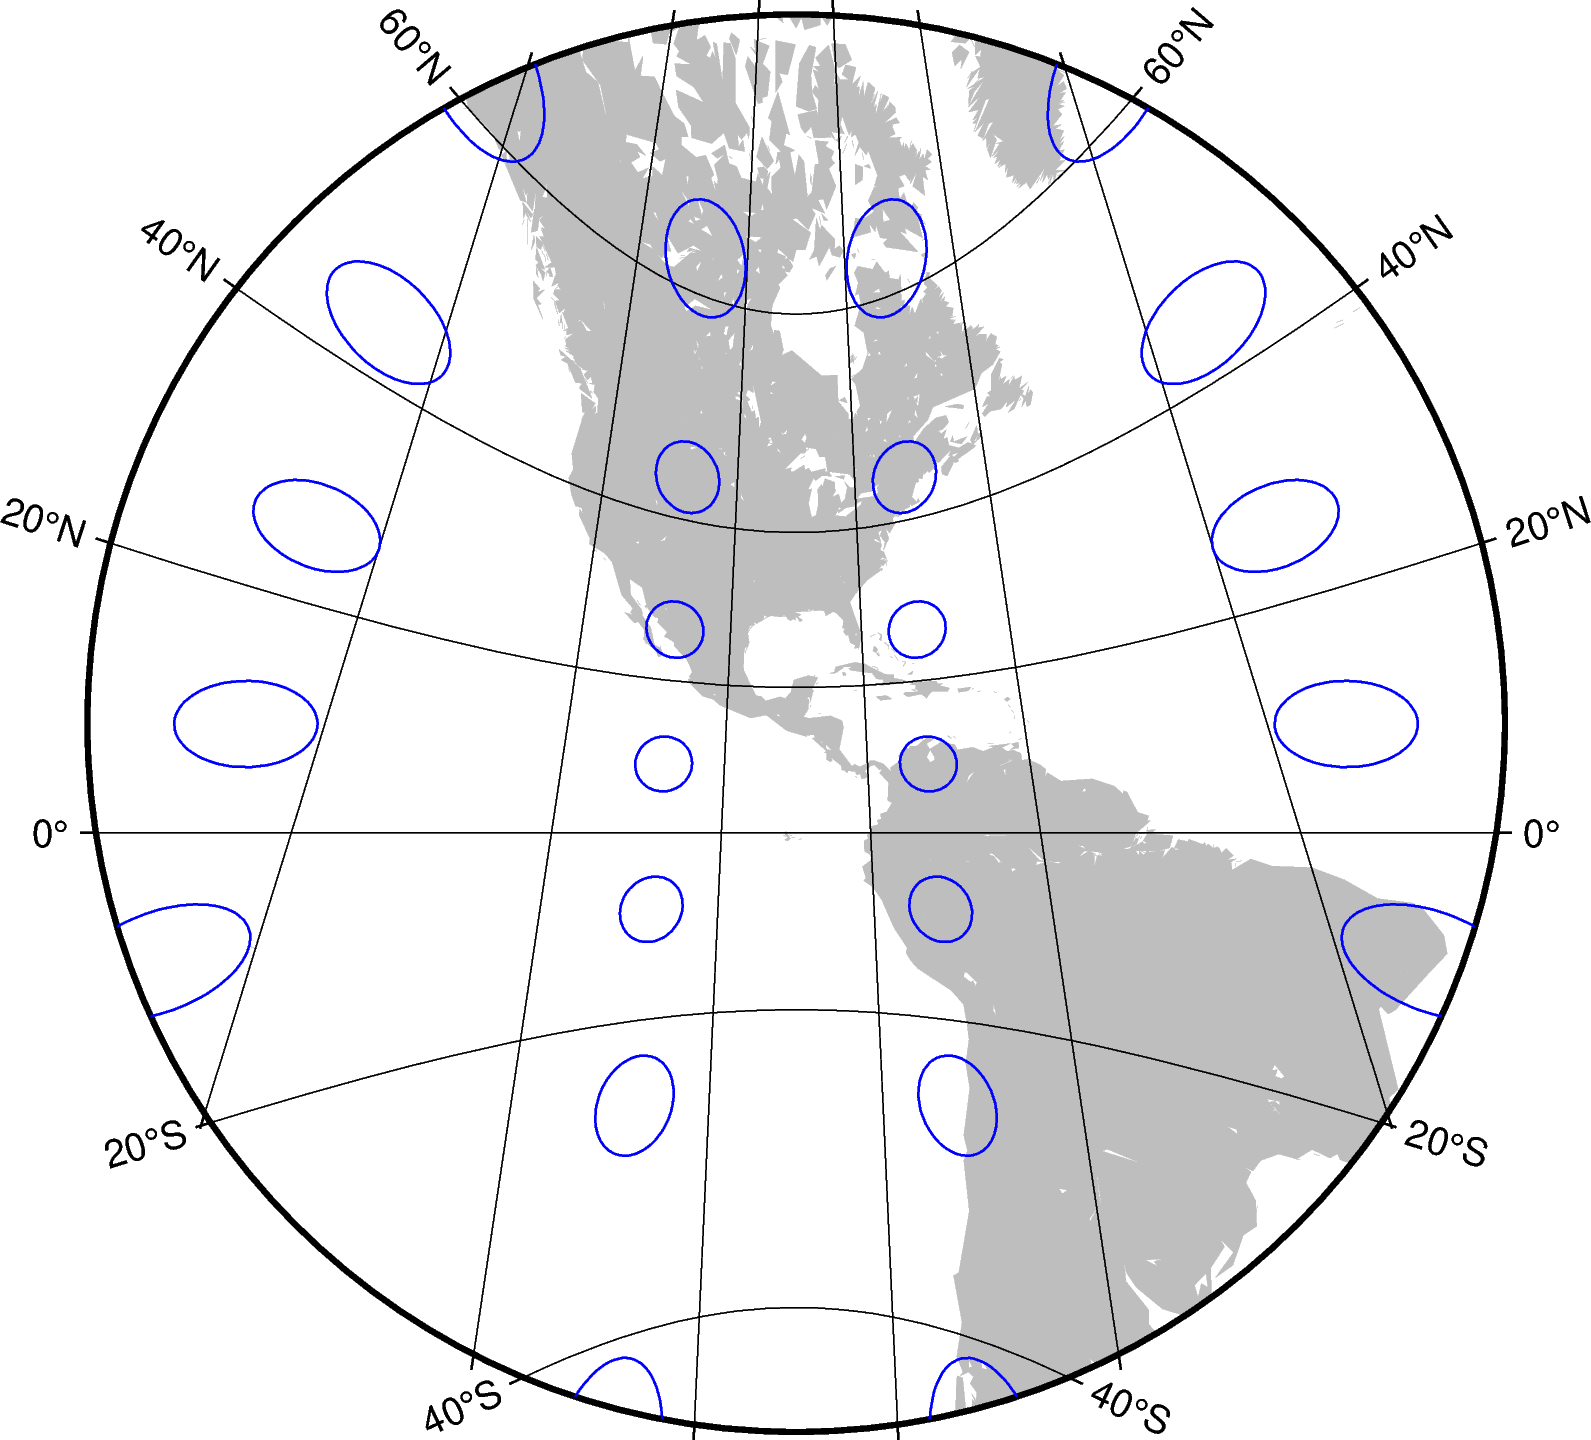

In [96]:
Tissot=True

geoms = []
for lat in np.linspace(-80, 80, 10):
    for lon in np.linspace(-180, 180, 10, endpoint=False):
        lons, lats = circle(geod, lon, lat, radius_km * 1e3, n_samples)
        geoms.append(sgeom.Polygon(zip(lons, lats)))

gdf = GeoSeries(geoms)


fig = pygmt.Figure()
fig.coast(projection="F-90/15/12c", region="g", frame="20g20", land="gray")
if (Tissot):
    fig.plot(
        data=gdf,
        pen="0.5p,blue",
    )
fig.show()